In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
upload = files.upload()

Saving train_data to train_data


In [4]:
train_data = pd.read_csv("/content/train_data")
train_data.head()

,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category
0,Kelaniya,1209.60,756.00,5292.00,4
1,Moratuwa,1590.12,1060.08,6007.12,1
2,Wattala,2288.88,1481.04,9155.52,4
3,Wattala,2274.94,1739.66,9099.76,4
4,Kelaniya,2345.49,2069.55,9243.99,4


In [5]:
train_data.dtypes

,0
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_category,int64


In [6]:
train_data["cluster_category"] = train_data["cluster_category"].astype(str)

In [7]:
train_data.dtypes

,0
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_category,object


In [8]:
!pip install category-encoders

from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols = ["outlet_city"])
train_data = encoder.fit_transform(train_data)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [9]:
x = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

In [10]:
print(x)
print(f"x instances: {x.shape}")

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
0                   0              0              0              0   
1                   0              0              0              1   
2                   0              0              0              1   
3                   0              0              0              1   
4                   0              0              0              0   
...               ...            ...            ...            ...   
774142              0              1              1              1   
774143              1              0              0              0   
774144              0              1              1              0   
774145              1              0              1              0   
774146              1              0              0              1   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
0                   1       1209.60       756.00    5292.00  
1                   0       1590.12

In [11]:
print(y)
print(f"y instances: {y.shape}")

0         4
1         1
2         4
3         4
4         4
         ..
774142    3
774143    3
774144    3
774145    3
774146    3
Name: cluster_category, Length: 774147, dtype: object
y instances: (774147,)


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [13]:
print(x_train)
print(f"x_train instances: {x_train.shape}")

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
668393              0              1              1              1   
164350              0              1              0              1   
288283              0              0              0              1   
63480               0              0              1              1   
57909               0              0              1              1   
...               ...            ...            ...            ...   
297938              0              1              0              0   
246426              0              0              1              0   
374047              0              1              0              1   
294449              0              1              0              0   
358273              0              0              0              1   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
668393              1       2781.03     11287.71    1799.49  
164350              0       2344.48

In [14]:
print(x_test)
print(f"x_test instances: {x_test.shape}")

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
346561              0              0              0              1   
142428              0              0              0              1   
134025              0              0              0              1   
599677              0              1              1              0   
219213              0              1              0              0   
...               ...            ...            ...            ...   
561400              1              0              0              0   
583381              1              0              0              0   
57443               0              0              0              0   
760461              0              1              0              1   
442066              1              0              0              1   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
346561              1       5155.15      4713.28    4713.28  
142428              1        887.04

In [15]:
print(y_train)
print(f"y_train instances: {y_train.shape}")

668393    6
164350    4
288283    2
63480     4
57909     4
         ..
297938    2
246426    2
374047    1
294449    2
358273    5
Name: cluster_category, Length: 619317, dtype: object
y_train instances: (619317,)


In [16]:
print(y_test)
print(f"y_test instances: {y_test.shape}")

346561    5
142428    4
134025    4
599677    6
219213    2
         ..
561400    6
583381    6
57443     4
760461    3
442066    1
Name: cluster_category, Length: 154830, dtype: object
y_test instances: (154830,)


In [17]:
from sklearn.preprocessing import RobustScaler
rc = RobustScaler()
x_train.iloc[:,5:8] = rc.fit_transform(x_train.iloc[:,5:8])
x_test.iloc[:,5:8] = rc.transform(x_test.iloc[:,5:8])

In [18]:
print(x_train)

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
668393              0              1              1              1   
164350              0              1              0              1   
288283              0              0              0              1   
63480               0              0              1              1   
57909               0              0              1              1   
...               ...            ...            ...            ...   
297938              0              1              0              0   
246426              0              0              1              0   
374047              0              1              0              1   
294449              0              1              0              0   
358273              0              0              0              1   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
668393              1      0.947128     1.571412  -0.358669  
164350              0      0.559146

In [19]:
print(x_test)

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
346561              0              0              0              1   
142428              0              0              0              1   
134025              0              0              0              1   
599677              0              1              1              0   
219213              0              1              0              0   
...               ...            ...            ...            ...   
561400              1              0              0              0   
583381              1              0              0              0   
57443               0              0              0              0   
760461              0              1              0              1   
442066              1              0              0              1   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
346561              1      3.057120     0.268962   0.183312  
142428              1     -0.736149

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 1, weights = "uniform")
classifier.fit(x_train, y_train)

KNeighborsClassifier(p=1)

In [21]:
y_pred = classifier.predict(x_test)
comparision = pd.DataFrame({"Actual Cluster Category":y_test, "Predicted Cluster Category":y_pred})
comparision.head(10)

,Actual Cluster Category,Predicted Cluster Category
346561,5,5
142428,4,4
134025,4,4
599677,6,6
219213,2,2
358140,5,5
37249,4,4
258524,2,2
281878,2,2
628451,6,6


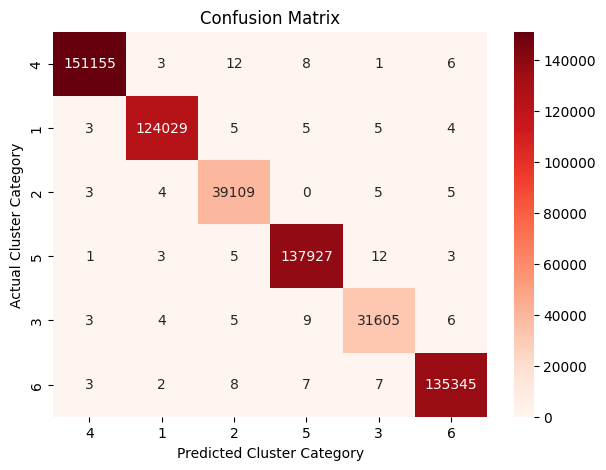

KNN Train Model Accuracy: 0.9997626417488944


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
x_pred = classifier.predict(x_train)

cm_train = confusion_matrix(y_train, x_pred)
labels = train_data["cluster_category"].unique()

plt.figure(figsize = (7,5))
sns.heatmap(cm_train, annot = True, fmt = "d", cmap = "Reds", xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted Cluster Category")
plt.ylabel("Actual Cluster Category")
plt.title("Confusion Matrix")
plt.show()

print(f"KNN Train Model Accuracy: {accuracy_score(y_train, x_pred)}")

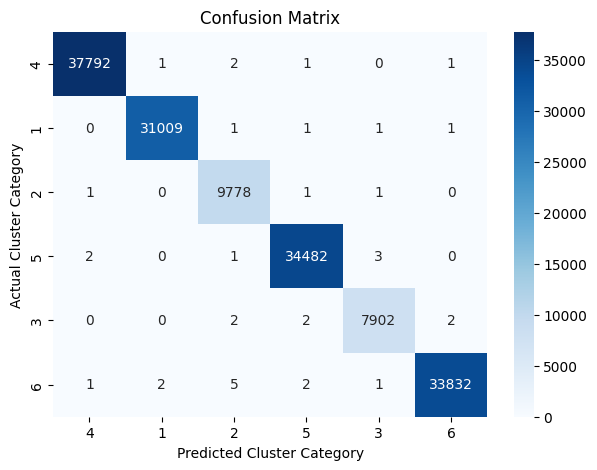

KNN Test Model Accuracy: 0.9997739456177743


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_test = confusion_matrix(y_test, y_pred)
labels = train_data["cluster_category"].unique()

plt.figure(figsize = (7,5))
sns.heatmap(cm_test, annot = True, fmt = "d", cmap = "Blues", xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted Cluster Category")
plt.ylabel("Actual Cluster Category")
plt.title("Confusion Matrix")
plt.show()

print(f"KNN Test Model Accuracy: {accuracy_score(y_test, y_pred)}")

In [24]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))
print("Total Error: {:.2f}%".format((1 - accuracies).mean()*100))

Accuracy: 99.98%
Standard Deviation: 0.01%
Total Error: 0.02%


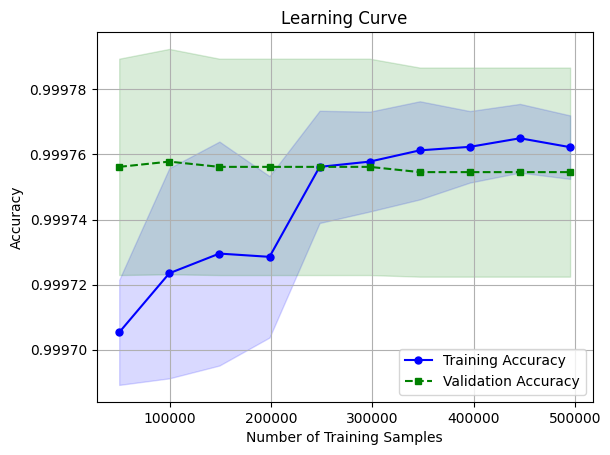

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=classifier,
                                                        X = x_train, y = y_train, cv = 5,
                                                        scoring = 'accuracy',
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        n_jobs = -1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize = 5, label = 'Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')
plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc = 'lower right')
plt.show()

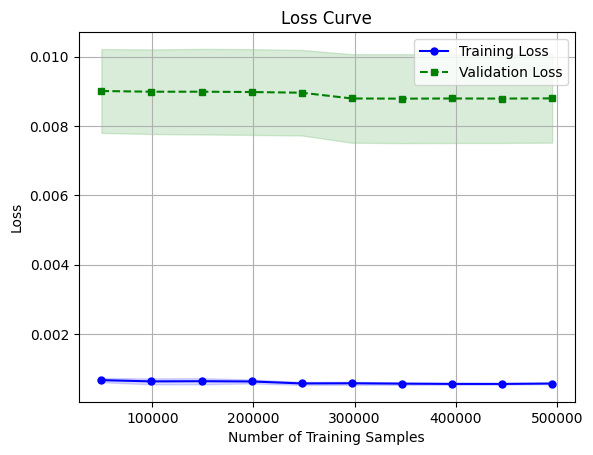

In [27]:
train_sizes, train_scores, test_scores = learning_curve(estimator = classifier, X = x_train,
                                                        y = y_train, cv = 5, scoring = 'neg_log_loss',
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        n_jobs = -1)

train_mean = -np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = -np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training Loss')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'Validation Loss')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
hyper_parameters = [{"n_neighbors":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                    "weights":["uniform", "distance"],
                    "p":[1,2]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = hyper_parameters,
                           scoring = "accuracy",
                           cv = 5)

grid_search.fit(x_train,y_train)
best_accuracy = grid_search.best_score_
best_hyper_parameters = grid_search.best_params_

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Hyper Parameters: {best_hyper_parameters}")

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37797
           2       1.00      1.00      1.00     31013
           3       1.00      1.00      1.00      9781
           4       1.00      1.00      1.00     34488
           5       1.00      1.00      1.00      7908
           6       1.00      1.00      1.00     33843

    accuracy                           1.00    154830
   macro avg       1.00      1.00      1.00    154830
weighted avg       1.00      1.00      1.00    154830



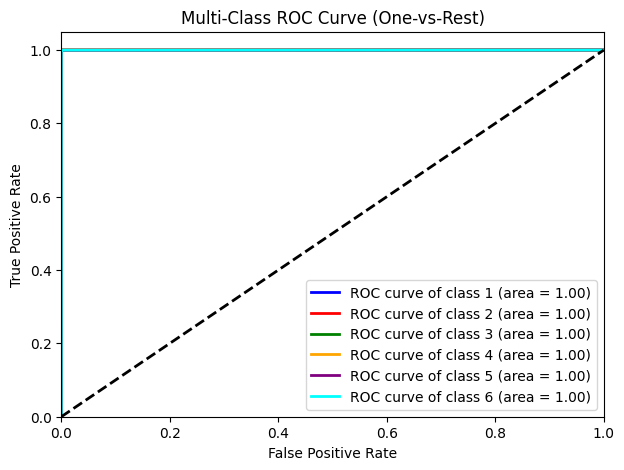

In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

y_test_bin = label_binarize(y_test, classes = classifier.classes_)
n_classes = y_test_bin.shape[1]

classifier_ovr = OneVsRestClassifier(classifier)
classifier_ovr.fit(x_train, y_train)

y_score = classifier_ovr.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize = (7, 5))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classifier.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (One-vs-Rest)')
plt.legend(loc = "lower right")
plt.show()